In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



In [ ]:
import gdown
import pandas as pd

# New file ID from the provided Google Drive link
file_id = '1135MMLXwOixqoJwdmGl9Il6CMKoVV0E2'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'dataset.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=1135MMLXwOixqoJwdmGl9Il6CMKoVV0E2
To: /content/dataset.csv
100%|██████████| 162k/162k [00:00<00:00, 38.6MB/s]

   Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0             

In [ ]:
df=data.copy()

In [ ]:
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [ ]:
# Data variable names
df.columns


Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [ ]:
#size of the df
df.shape

(1429, 23)

In [ ]:
#Unique levels in each variable
df.nunique()

,0
Survey_id,1429
Ville_id,255
sex,2
Age,71
Married,2
Number_children,12
education_level,18
total_members,12
gained_asset,441
durable_asset,590


In [ ]:
# data types
df.dtypes

,0
Survey_id,int64
Ville_id,int64
sex,int64
Age,int64
Married,int64
Number_children,int64
education_level,int64
total_members,int64
gained_asset,int64
durable_asset,int64


In [ ]:
# missing values
df.isnull().sum()

,0
Survey_id,0
Ville_id,0
sex,0
Age,0
Married,0
Number_children,0
education_level,0
total_members,0
gained_asset,0
durable_asset,0


Survey_id: Nominal-Categorical → int or string (depending on how it's represented)

Ville_id: Nominal-Categorical → int

sex: Binary-Categorical (1 = Female, 0 = Male) → category

Age: Quantitative → int

Married: Binary-Categorical (1 = married, 0 = unmarried) → category

Number_children: Ordinal Categorical → int

education_level: Ordinal Categorical → int

total_members: Ordinal Categorical → int

gained_asset: Quantitative → float or int

durable_asset: Quantitative → float or int

save_asset: Quantitative → float or int

living_expenses: Quantitative → float or int

other_expenses: Quantitative → float or int

incoming_salary: Binary-Categorical (1 = Yes, 0 = No) → category

incoming_own_farm: Binary-Categorical (1 = Yes, 0 = No) → category

incoming_business: Binary-Categorical (1 = Yes, 0 = No) → category

incoming_no_business: Binary-Categorical (1 = Yes, 0 = No) → category

incoming_agricultural: Quantitative → float or int

farm_expenses: Quantitative → float or int

labor_primary: Binary-Categorical (1 = Yes, 0 = No) → category

lasting_investment: Quantitative → float or int

no_lasting_investmen: Binary-Categorical (1 = No, 0 = Yes) → category

depressed: Binary-Categorical (0 = No, 1 = Yes) → category

In [ ]:
# Set appropriate data types
df['Survey_id'] = df['Survey_id'].astype('int')
df['Ville_id'] = df['Ville_id'].astype('int')
df['sex'] = df['sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Married'] = df['Married'].astype('category')
df['Number_children'] = df['Number_children'].astype('int')
df['education_level'] = df['education_level'].astype('int')
df['total_members'] = df['total_members'].astype('int')
df['gained_asset'] = df['gained_asset'].astype('float')
df['durable_asset'] = df['durable_asset'].astype('float')
df['save_asset'] = df['save_asset'].astype('float')
df['living_expenses'] = df['living_expenses'].astype('float')
df['other_expenses'] = df['other_expenses'].astype('float')
df['incoming_salary'] = df['incoming_salary'].astype('category')
df['incoming_own_farm'] = df['incoming_own_farm'].astype('category')
df['incoming_business'] = df['incoming_business'].astype('category')
df['incoming_no_business'] = df['incoming_no_business'].astype('category')
df['incoming_agricultural'] = df['incoming_agricultural'].astype('float')
df['farm_expenses'] = df['farm_expenses'].astype('float')
df['labor_primary'] = df['labor_primary'].astype('category')
df['lasting_investment'] = df['lasting_investment'].astype('float')
df['no_lasting_investmen'] = df['no_lasting_investmen'].astype('float')
df['depressed'] = df['depressed'].astype('category')

In [ ]:
# data types
df.dtypes

,0
Survey_id,int64
Ville_id,int64
sex,category
Age,int64
Married,category
Number_children,int64
education_level,int64
total_members,int64
gained_asset,float64
durable_asset,float64


In [ ]:
# Catergorical variables and numerical variables
categorical_variables = df.select_dtypes(include=['category']).columns
numerical_variables = df.select_dtypes(include=['int', 'float']).columns

In [ ]:
#df related to categorical_variables
df_categorical = df[categorical_variables]
df_categorical

,sex,Married,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,labor_primary,depressed
0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1424,1,1,0,0,0,0,0,0
1425,1,1,0,1,0,0,0,0
1426,1,0,0,1,0,0,0,1
1427,1,1,0,0,0,0,0,0


In [ ]:
numerical_variables



Index(['Survey_id', 'Ville_id', 'Age', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_agricultural',
       'farm_expenses', 'lasting_investment', 'no_lasting_investmen'],
      dtype='object')

In [ ]:
#df related to categorical_variables
df_numerical = df[numerical_variables]
df_numerical

,Survey_id,Ville_id,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
0,926,91,28,4,10,5,28912201.0,22861940.0,23399979.0,26692283.0,28203066.0,30028818.0,31363432.0,28411718.0,28292707.0
1,747,57,23,3,8,5,28912201.0,22861940.0,23399979.0,26692283.0,28203066.0,30028818.0,31363432.0,28411718.0,28292707.0
2,1190,115,22,3,9,5,28912201.0,22861940.0,23399979.0,26692283.0,28203066.0,30028818.0,31363432.0,28411718.0,28292707.0
3,1065,97,27,2,10,4,52667108.0,19698904.0,49647648.0,397715.0,44042267.0,22288055.0,18751329.0,7781123.0,69219765.0
4,806,42,59,4,10,6,82606287.0,17352654.0,23399979.0,80877619.0,74503502.0,53384566.0,20731006.0,20100562.0,43419447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,25,1,7,5,28912201.0,22861940.0,23399979.0,26692283.0,28203066.0,30028818.0,31363432.0,28411718.0,28292707.0
1425,547,69,28,4,10,6,15711078.0,24023054.0,15506558.0,10476722.0,71588707.0,23022095.0,1021536.0,1823477.0,47384361.0
1426,893,184,66,0,1,1,42440731.0,22861940.0,22562605.0,12545372.0,56534257.0,12545373.0,10454478.0,46444572.0,10454478.0
1427,363,75,51,1,12,5,28912201.0,22861940.0,23399979.0,26692283.0,28203066.0,30028818.0,31363432.0,28411718.0,28292707.0


In [ ]:
# missing values in each column
df.isnull().mean()

,0
Survey_id,0.000000
Ville_id,0.000000
sex,0.000000
Age,0.000000
Married,0.000000
Number_children,0.000000
education_level,0.000000
total_members,0.000000
gained_asset,0.000000
durable_asset,0.000000


In [ ]:
# describe no_lasting_investmen 	variable
df['no_lasting_investmen'].describe()

,no_lasting_investmen
count,1.409000e+03
mean,3.360385e+07
std,2.160228e+07
min,1.263120e+05
25%,2.064203e+07
50%,2.829271e+07
75%,4.151762e+07
max,9.965119e+07


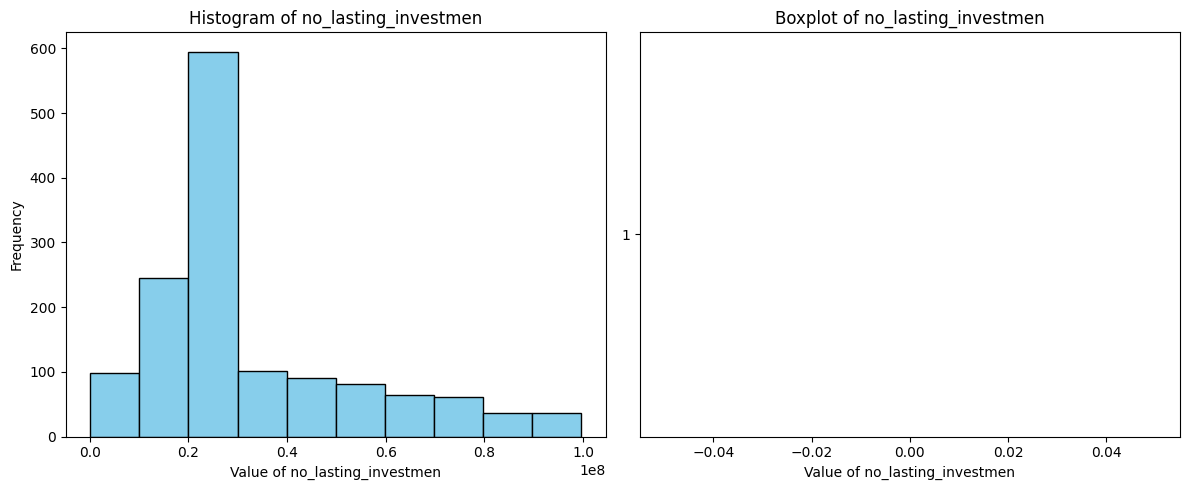

In [ ]:
# Plotting histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram for 'no_lasting_investmen'
plt.subplot(1, 2, 1)
plt.hist(df['no_lasting_investmen'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of no_lasting_investmen')
plt.xlabel('Value of no_lasting_investmen')
plt.ylabel('Frequency')

# Boxplot for 'no_lasting_investmen'
plt.subplot(1, 2, 2)
plt.boxplot(df['no_lasting_investmen'], vert=False)
plt.title('Boxplot of no_lasting_investmen')
plt.xlabel('Value of no_lasting_investmen')

# Show both plots
plt.tight_layout()
plt.show()

In [ ]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['incoming_salary'] = label_encoder.fit_transform(df['incoming_salary'])
df['incoming_own_farm'] = label_encoder.fit_transform(df['incoming_own_farm'])
df['incoming_business'] = label_encoder.fit_transform(df['incoming_business'])
df['incoming_no_business'] = label_encoder.fit_transform(df['incoming_no_business'])
df['labor_primary'] = label_encoder.fit_transform(df['labor_primary'])
df['no_lasting_investmen'] = label_encoder.fit_transform(df['no_lasting_investmen'])
df['depressed'] = label_encoder.fit_transform(df['depressed'])

# One-Hot Encoding for nominal/ordinal categorical variables
df = pd.get_dummies(df, columns=['Number_children', 'education_level', 'total_members'], drop_first=True)

# Check the data types after encoding
print(df.dtypes)